<a href="https://colab.research.google.com/github/Syasa1/DAP/blob/main/%5BLab_session_5%5D_Data_Preprocessing_Part1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [172]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


# Filtering Data
Filter only DataFrame with numeric attribute.

In [171]:
numericDf = df.describe()
numericDf

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


# Handling Outlier

**[TODO]** Exclude the outlier (cars) with too much expensive.
* Assume that `price` of outlier is greater than `Q3 + (1.5 * IQR)`.

In [63]:
attribute = 'Price'

Q1 = df[attribute].quantile(0.25)
Q3 = df[attribute].quantile(0.75)
IQR = Q3-Q1
outlierStep = 1.5*IQR

filtered_df = df.describe()

Draw histogram of `price`.

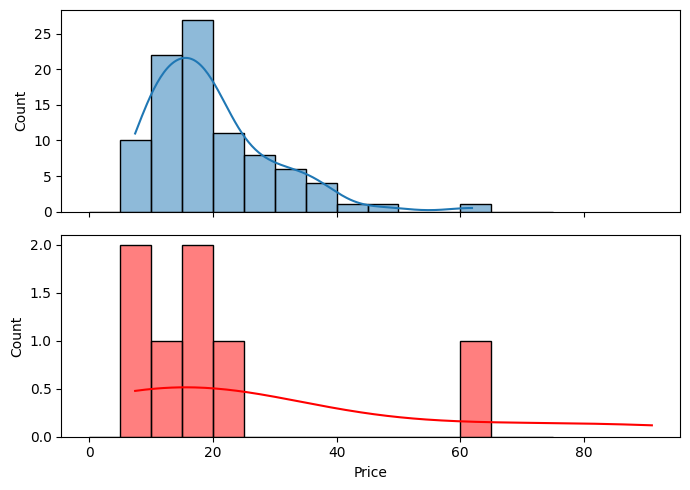

In [170]:
f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.histplot(data=df, x='Price', ax=axes[0], kde=True,
             bins=np.arange(0,80,5))
sns.histplot(data=filtered_df, x='Price', color='Red',
             ax=axes[1], kde=True, bins=np.arange(0,80,5))
f.tight_layout()

# Hanlding Missing Value
---
Last time, we dropped the NaN value, impute this time.

print the `head()` of numeric_df

In [169]:
numericDf.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000


There are many NaN values exist.

Use `info()` to check the details.

In [34]:
numericDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           8 non-null      float64
 1   Price               8 non-null      float64
 2   Max.Price           8 non-null      float64
 3   MPG.city            8 non-null      float64
 4   MPG.highway         8 non-null      float64
 5   EngineSize          8 non-null      float64
 6   Horsepower          8 non-null      float64
 7   RPM                 8 non-null      float64
 8   Rev.per.mile        8 non-null      float64
 9   Fuel.tank.capacity  8 non-null      float64
 10  Passengers          8 non-null      float64
 11  Length              8 non-null      float64
 12  Wheelbase           8 non-null      float64
 13  Width               8 non-null      float64
 14  Turn.circle         8 non-null      float64
 15  Rear.seat.room      8 non-null      float64
 16  Luggage.roo

**[TODO]** Impute the data with missing value with `SimpleImputer` with `median`.
---
[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [168]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(missing_values=np.nan,strategy='median')
imp_median.fit(numericDf)

imputedNumericDf = pd.DataFrame(imp_median.transform(numericDf),columns=numericDf.columns)
imputedNumericDf.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
1,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
2,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
3,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
4,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000


Check through `info()` that NaN values don't exist any more.

In [49]:
imputedNumericDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           8 non-null      float64
 1   Price               8 non-null      float64
 2   Max.Price           8 non-null      float64
 3   MPG.city            8 non-null      float64
 4   MPG.highway         8 non-null      float64
 5   EngineSize          8 non-null      float64
 6   Horsepower          8 non-null      float64
 7   RPM                 8 non-null      float64
 8   Rev.per.mile        8 non-null      float64
 9   Fuel.tank.capacity  8 non-null      float64
 10  Passengers          8 non-null      float64
 11  Length              8 non-null      float64
 12  Wheelbase           8 non-null      float64
 13  Width               8 non-null      float64
 14  Turn.circle         8 non-null      float64
 15  Rear.seat.room      8 non-null      float64
 16  Luggage.room

**[TODO]** Impute the data with missing value with `Knn imputation
` with `n_neighbors = 2` and give weight by `distance`


In [167]:
from sklearn.impute import KNNImputer

imp_KNN = KNNImputer(n_neighbors=2, weights='distance')

imputeDF_KNN = pd.DataFrame(imp_KNN.fit_transform(df.select_dtypes(include='number')), columns=df.select_dtypes(include='number').columns)
imputeDF_KNN.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.900000,15.9,18.80000,25.0,31.0,1.800000,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.00000,37.0,26.5,13.053113,2705.0
1,29.200000,33.9,38.70000,18.0,25.0,3.200000,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.00000,38.0,30.0,15.000000,3560.0
2,25.900000,29.1,32.30000,20.0,26.0,2.800000,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.00000,37.0,28.0,14.000000,3375.0
3,28.332082,37.7,44.60000,19.0,26.0,3.097892,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,70.48946,37.0,31.0,17.000000,3405.0
4,17.737339,30.0,21.95971,22.0,30.0,3.500000,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.00000,39.0,27.0,13.000000,3640.0


# Balancing Data

Draw a catplot plotting the x-axis using `DrivenTrain` and set the type of plot to be drawn to `count`.
[catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

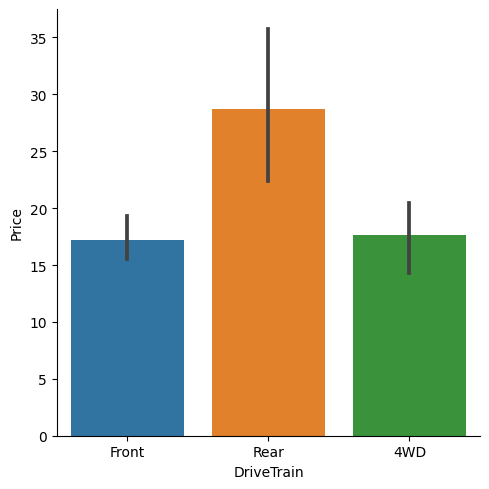

In [166]:
sns.catplot(data=df, x="DriveTrain", y="Price",kind="bar")
f.tight_layout()

**[TODO]** Undersample the `Front` and `Rear` cars as much as `4WD` cars.

In [181]:
num_Front = df['DriveTrain']
num_Rear = df['DriveTrain']
num_4WD = df['DriveTrain']

# random undersample
undersampledDf = pd.concat([num_Front,num_Rear,num_4WD])

sns.catplot(data=undersampledDf, kind="count", x='DriveTrain')
f.tight_layout()

ValueError: ignored

## Oversampling

Add column `DriveTrain` from `df` to `imputedNumericDf` which was used for knn imputer above. And drop the sample with missing value on `DriveTrain` using `.dropna()` method of `pd`.

In [135]:
imputedNumericDf['DriveTrain'] = df['DriveTrain']
imputedNumericDf = imputedNumericDf.dropna()

**[TODO]** By using SMOTE, resample all classes but the majority class, `Front`. Pleaser check the parameter, `sampling_strategy`, in [[ref](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)].

In [163]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE
X = df
y = imputedNumericDf

smote = SMOTE(sampling_strategy='not minority',k_neighbors=15)
X_resampled, y_resampled = smote.fit_resample(imputedNumericDf.drop(columns='DriveTrain'), imputedNumericDf['DriveTrain'])

df_resampled = pd.DataFrame(X_resampled, columns=imputedNumericDf.columns)
df_resampled['DriveTrain'] = df['DriveTrain']
df_resampled

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,DriveTrain
0,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000,Front
1,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023,Front
2,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993,Front
3,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000,NaN
4,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000,Rear
5,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000,NaN



Show the smote results as a plot.

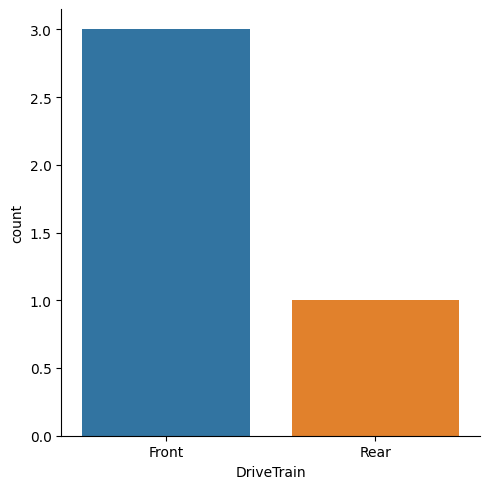

In [164]:
sns.catplot(data=df_resampled, kind="count", x='DriveTrain')
f.tight_layout()